### Step 1: Data Loading and Preprocessing

#### Task 1: Load the League of Legends dataset and preprocess it for training.

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features. You will utilize `pandas` for data manipulation, `train_test_split` from `sklearn` for data splitting, and `StandardScaler` for feature scaling.

Note: Please ensure all the required libraries are installed and imported.

1. Load the dataset:
   Use `pd.read_csv()` to load the dataset into a pandas DataFrame.
   
2. Split data into features and target: Separate win (target) and the remaining columns (features).
   - X = data.drop('win', axis=1)
   - y = data['win']
   
3. Split the Data into Training and Testing Sets:
   Use `train_test_split()` from `sklearn.model_selection` to divide the data. Set `test_size`=0.2 to allocate 20% for testing and 80% for training, and use `random_state`=42 to ensure reproducibility of the split.
   
4. Standardize the features:
   Use `StandardScaler()` from sklearn.preprocessing to scale the features.
   
5. Convert to PyTorch tensors:
   Use `torch.tensor()` to convert the data to PyTorch tensors.

#### Exercise 1:

Write a code to load the dataset, split it into training and testing sets, standardize the features, and convert the data into PyTorch tensors for use in training a PyTorch model.

1. Load the dataset:
   Use `pd.read_csv()` to load the dataset into a pandas DataFrame.

In [20]:
import pandas as pd

df = pd.read_csv("league_of_legends_data_large.csv")
print(df.head())

   win  kills  deaths  assists  gold_earned   cs  wards_placed  wards_killed  \
0    0     16       6       19        17088  231            11             7   
1    1      8       8        5        14865  259            10             2   
2    0      0      17       11        15919  169            14             5   
3    0     19      11        1        11534  264            14             3   
4    0     12       7        6        18926  124            15             7   

   damage_dealt  
0         15367  
1         38332  
2         24642  
3         15789  
4         40268  


2. Split data into features and target: Separate win (target) and the remaining columns (features).
   - X = data.drop('win', axis=1)
   - y = data['win']

In [21]:
X = df.drop("win", axis=1)
y = df["win"]



3. Split the Data into Training and Testing Sets:
   Use `train_test_split()` from `sklearn.model_selection` to divide the data. Set `test_size`=0.2 to allocate 20% for testing and 80% for training, and use `random_state`=42 to ensure reproducibility of the split.


In [22]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4. Standardize the features:
   Use `StandardScaler()` from sklearn.preprocessing to scale the features.

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

5. Convert to PyTorch tensors:
   Use `torch.tensor()` to convert the data to PyTorch tensors.

In [24]:
import torch

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

6. Create DataLoaders
Create PyTorch DataLoader objects to efficiently handle batches during training:

Set up batch processing:
Define batch size as 32
Create TensorDatasets from training and testing tensors
Initialize DataLoaders with specified batch size
Enable shuffling for training data

In [25]:
from torch.utils.data import DataLoader, TensorDataset

batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Print shapes to verify
print(f"Training set shape: {X_train_tensor.shape}")
print(f"Testing set shape: {X_test_tensor.shape}")

Training set shape: torch.Size([800, 8])
Testing set shape: torch.Size([200, 8])


### Step 2: Logistic Regression Model

#### Task 2: Implement a logistic regression model using PyTorch.

Defining the logistic regression model involves specifying the input dimensions, the forward pass using the sigmoid activation function, and initializing the model, loss function, and optimizer.

1. Define the Logistic Regression Model:
   Create a class LogisticRegressionModel that inherits from torch.nn.Module.
   - In the `__init__()` method, define a linear layer (nn.Linear) to implement the logistic regression model.
   - The `forward()` method should apply the sigmoid activation function to the output of the linear layer.

2. Initialize the Model, Loss Function, and Optimizer:
   - Set input_dim: Use `X_train.shape[1]` to get the number of features from the training data (X_train).
   - Initialize the model: Create an instance of the LogisticRegressionModel class (e.g., `model = LogisticRegressionModel()`) while passing input_dim as a parameter
   - Loss Function: Use `BCELoss()` from torch.nn (Binary Cross-Entropy Loss).
   - Optimizer: Initialize the optimizer using `optim.SGD()` with a learning rate of 0.01

#### Exercise 2:

Define the logistic regression model using PyTorch, specifying the input dimensions and the forward pass. Initialize the model, loss function, and optimizer.


In [26]:
import torch
import torch.nn as nn
import torch.optim as optim

# 1. Define the Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

# Get input dimensions from training data
input_dim = X_train_tensor.shape[1]

# 2. Initialize model, loss function and optimizer
model = LogisticRegressionModel(input_dim)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Print model architecture
print(f"Model architecture:")
print(model)
print(f"\nNumber of features (input dimension): {input_dim}")

Model architecture:
LogisticRegressionModel(
  (linear): Linear(in_features=8, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

Number of features (input dimension): 8


### Step 3: Model Training

#### Task 3: Train the logistic regression model on the dataset.

The training loop will run for a specified number of epochs. In each epoch, the model makes predictions, calculates the loss, performs backpropagation, and updates the model parameters.

1. Set Number of Epochs:  
   - Define the number of epochs for training to 1000.

2. Training Loop:  
   For each epoch:
   - Set the model to training mode using `model.train()`.
   - Zero the gradients using `optimizer.zero_grad()`.
   - Pass the training data (`X_train`) through the model to get the predictions (`outputs`).
   - Calculate the loss using the defined loss function (`criterion`).
   - Perform backpropagation with `loss.backward()`.
   - Update the model's weights using `optimizer.step()`.

3. Print Loss Every 100 Epochs:  
   - After every 100 epochs, print the current epoch number and the loss value.

4. Model Evaluation:  
   - Set the model to evaluation mode using `model.eval()`.
   - Use `torch.no_grad()` to ensure no gradients are calculated during evaluation.
   - Get predictions on both the training set (`X_train`) and the test set (`X_test`).

5. Calculate Accuracy:  
   - For both the training and test datasets, compute the accuracy by comparing the predicted values with the true values (`y_train`, `y_test`).
   - Use a threshold of 0.5 for classification
   
6. Print Accuracy:  
   - Print the training and test accuracies after the evaluation is complete.

#### Exercise 3:

Write the code to train the logistic regression model on the dataset. Implement the training loop, making predictions, calculating the loss, performing backpropagation, and updating model parameters. Evaluate the model's accuracy on training and testing sets.


In [27]:
# Set number of epochs
num_epochs = 1000

# Training loop
for epoch in range(num_epochs):
    # Set model to training mode
    model.train()
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    # Training predictions
    train_outputs = model(X_train_tensor)
    train_predictions = (train_outputs >= 0.5).float()
    train_accuracy = (train_predictions == y_train_tensor).float().mean()
    
    # Test predictions
    test_outputs = model(X_test_tensor)
    test_predictions = (test_outputs >= 0.5).float()
    test_accuracy = (test_predictions == y_test_tensor).float().mean()

# Print results
print(f'\nTraining Accuracy: {train_accuracy.item():.4f}')
print(f'Test Accuracy: {test_accuracy.item():.4f}')

Epoch [100/1000], Loss: 0.7013
Epoch [200/1000], Loss: 0.6950
Epoch [300/1000], Loss: 0.6911
Epoch [400/1000], Loss: 0.6887
Epoch [500/1000], Loss: 0.6873
Epoch [600/1000], Loss: 0.6865
Epoch [700/1000], Loss: 0.6860
Epoch [800/1000], Loss: 0.6857
Epoch [900/1000], Loss: 0.6855
Epoch [1000/1000], Loss: 0.6854

Training Accuracy: 0.5450
Test Accuracy: 0.5200


### Step 4: Model Optimization and Evaluation

#### Task 4: Implement optimization techniques and evaluate the model's performance.

Optimization techniques such as L2 regularization (Ridge Regression) help in preventing overfitting. The model is retrained with these optimizations, and its performance is evaluated on both training and testing sets.

**Weight Decay**: In the context of machine learning and specifically in optimization algorithms, weight_decay is a parameter used to apply L2 regularization to the model's parameters (weights). It helps prevent the model from overfitting by penalizing large weight values, thereby encouraging the model to find simpler solutions. To use L2 regularization, you need to modify the optimizer by setting the weight_decay parameter. The weight_decay parameter in the optimizer adds the L2 regularization term during training.

For example, when you initialize the optimizer with `optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)`, the `weight_decay=0.01` term applies L2 regularization with a strength of 0.01.

1. Set Up the Optimizer with L2 Regularization:
   - Modify the optimizer to include `weight_decay` for L2 regularization.
   - Example:
     ```python
     optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)
     ```
2. Train the Model with L2 Regularization:
   - Follow the same steps as before but use the updated optimizer with regularization during training.
   - Use epochs=1000
   
3. Evaluate the Optimized Model:
   - After training, evaluate the model on both the training and test datasets.
   - Compute the accuracy for both sets by comparing the model's predictions to the true labels (`y_train` and `y_test`).

4. Calculate and Print the Accuracy:
   - Use a threshold of 0.5 to determine whether the model's predictions are class 0 or class 1.
   - Print the training accuracy and test accuracy after evaluation.

#### Exercise 4:

Implement optimization techniques like L2 regularization and retrain the model. Evaluate the performance of the optimized model on both training and testing sets.


In [28]:
import torch
import torch.nn as nn
import torch.optim as optim

# Reinitialize the model
input_dim = X_train_tensor.shape[1]
model = LogisticRegressionModel(input_dim)
criterion = nn.BCELoss()

# Initialize optimizer with L2 regularization
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)

# Training loop with L2 regularization
num_epochs = 1000
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    # Training mode
    model.train()
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Record training loss
    train_losses.append(loss.item())
    
    # Evaluate on test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        test_losses.append(test_loss.item())
    
    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Training Loss: {loss.item():.4f}')
        print(f'Test Loss: {test_loss.item():.4f}\n')

# Final evaluation
model.eval()
with torch.no_grad():
    # Training predictions
    train_outputs = model(X_train_tensor)
    train_predictions = (train_outputs >= 0.5).float()
    train_accuracy = (train_predictions == y_train_tensor).float().mean()
    
    # Test predictions
    test_outputs = model(X_test_tensor)
    test_predictions = (test_outputs >= 0.5).float()
    test_accuracy = (test_predictions == y_test_tensor).float().mean()

# Print final results
print("Final Results with L2 Regularization:")
print(f'Training Accuracy: {train_accuracy.item():.4f}')
print(f'Test Accuracy: {test_accuracy.item():.4f}')

Epoch [100/1000]
Training Loss: 0.7302
Test Loss: 0.7240

Epoch [200/1000]
Training Loss: 0.7127
Test Loss: 0.7127

Epoch [300/1000]
Training Loss: 0.7019
Test Loss: 0.7062

Epoch [400/1000]
Training Loss: 0.6952
Test Loss: 0.7025

Epoch [500/1000]
Training Loss: 0.6913
Test Loss: 0.7005

Epoch [600/1000]
Training Loss: 0.6889
Test Loss: 0.6995

Epoch [700/1000]
Training Loss: 0.6875
Test Loss: 0.6990

Epoch [800/1000]
Training Loss: 0.6866
Test Loss: 0.6988

Epoch [900/1000]
Training Loss: 0.6861
Test Loss: 0.6988

Epoch [1000/1000]
Training Loss: 0.6858
Test Loss: 0.6988

Final Results with L2 Regularization:
Training Accuracy: 0.5537
Test Accuracy: 0.5250


### Step 5: Visualization and Interpretation

Visualization tools like confusion matrices and ROC curves provide insights into the model's performance. The confusion matrix helps in understanding the classification accuracy, while the ROC curve illustrates the trade-off between sensitivity and specificity.

**Confusion Matrix**: A Confusion Matrix is a fundamental tool used in classification problems to evaluate the performance of a model. It provides a matrix showing the number of correct and incorrect predictions made by the model, categorized by the actual and predicted classes.

Where:
- **True Positive (TP)**: Correctly predicted positive class (class 1).
- **True Negative (TN)**: Correctly predicted negative class (class 0).
- **False Positive (FP)**: Incorrectly predicted as positive (class 1), but the actual class is negative (class 0). This is also called a Type I error.
- **False Negative (FN)**: Incorrectly predicted as negative (class 0), but the actual class is positive (class 1). This is also called a Type II error.

**ROC Curve (Receiver Operating Characteristic Curve)**:
The ROC Curve is a graphical representation used to evaluate the performance of a binary classification model across all classification thresholds. It plots two metrics:
- **True Positive Rate (TPR) or Recall (Sensitivity)**: It is the proportion of actual positive instances (class 1) that were correctly classified as positive by the model.
- **False Positive Rate (FPR)**: It is the proportion of actual negative instances (class 0) that were incorrectly classified as positive by the model.
  
**AUC**:
AUC stands for Area Under the Curve and is a performance metric used to evaluate the quality of a binary classification model. Specifically, it refers to the area under the ROC curve (Receiver Operating Characteristic curve), which plots the True Positive Rate (TPR) versus the False Positive Rate (FPR) for different threshold values.

**Classification Report**:
A Classification Report is a summary of various classification metrics, which are useful for evaluating the performance of a classifier on the given dataset.

#### Exercise 5:

Write code to visualize the model's performance using confusion matrices and ROC curves. Generate classification reports to evaluate precision, recall, and F1-score. Retrain the model with L2 regularization and evaluate the performance.


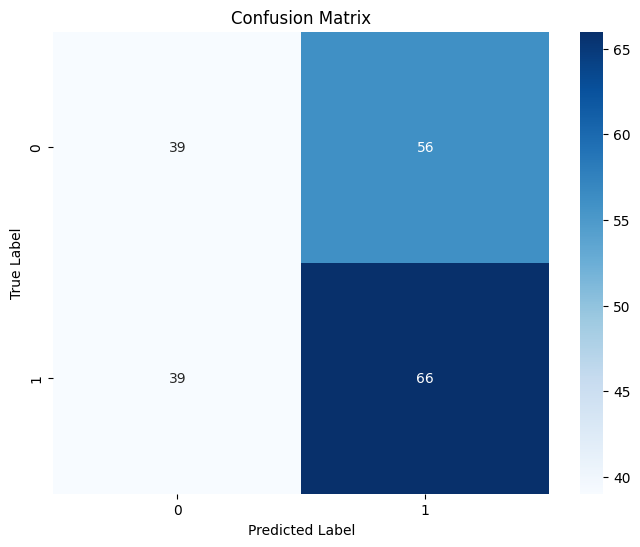

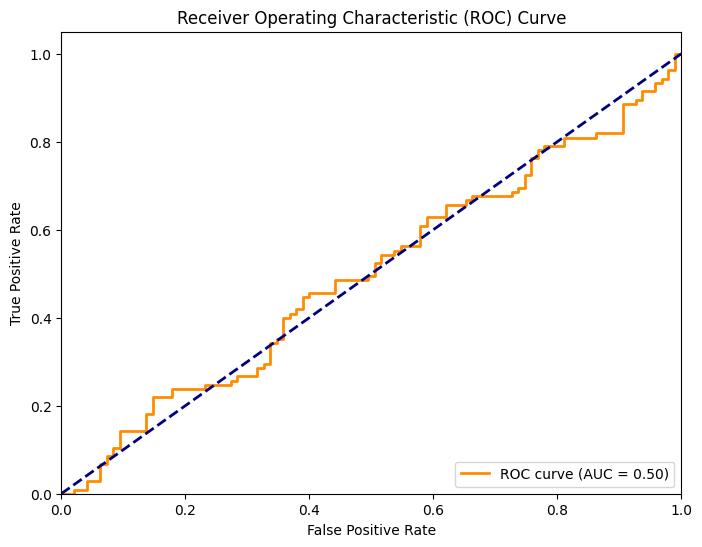


Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.41      0.45        95
         1.0       0.54      0.63      0.58       105

    accuracy                           0.53       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.53      0.52       200


Detailed Metrics:
Accuracy: 0.5250
Precision: 0.5410
Recall: 0.6286
F1-Score: 0.5815
AUC-ROC: 0.4989


In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

# Get predictions
model.eval()
with torch.no_grad():
    y_pred_proba = model(X_test_tensor).numpy()
    y_pred = (y_pred_proba >= 0.5).astype(int)
    y_true = y_test_tensor.numpy()

# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 3. Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# 4. Calculate additional metrics
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("\nDetailed Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

### Step 6: Model Saving and Loading

#### Task 6: Save and load the trained model.

This task demonstrates the techniques to persist a trained model using `torch.save` and reload it using `torch.load`. Evaluating the loaded model ensures that it retains its performance, making it practical for deployment in real-world applications.

1. Saving the Model:
   - Save the model's learned weights and biases using torch.save(). (e.g., `torch.save(model.state_dict(), 'your_model_name.pth')`)
   - Saving only the state dictionary (model parameters) is preferred because it's more flexible and efficient than saving the entire model object.

2. Loading the Model:
   - Create a new model instance (e.g., `model = LogisticRegressionModel()`) and load the saved parameters. (e.g., `model.load_state_dict(torch.load('your_model_name.pth'))`).

3. Evaluating the Loaded Model:
   - After loading, set the model to evaluation mode by calling `model.eval()`
   - After loading the model, evaluate it again on the test dataset to make sure it performs similarly to when it was first trained. Now evaluate it on the test data.
   - Use `torch.no_grad()` to ensure that no gradients are computed.

#### Exercise 6:

Write code to save the trained model and reload it. Ensure the loaded model performs consistently by evaluating it on the test dataset.


In [30]:
import torch

# Save the model's state dictionary
MODEL_PATH = 'lol_model.pth'
torch.save(model.state_dict(), MODEL_PATH)
print(f"Model saved to {MODEL_PATH}")

Model saved to lol_model.pth


In [31]:
# Create a new model instance
new_model = LogisticRegressionModel(input_dim=X_train_tensor.shape[1])

# Load the saved state dictionary
new_model.load_state_dict(torch.load(MODEL_PATH))
print("Model loaded successfully")

Model loaded successfully


In [32]:
# Set the model to evaluation mode
new_model.eval()

# Evaluate the loaded model
with torch.no_grad():
    # Test predictions
    test_outputs = new_model(X_test_tensor)
    test_predictions = (test_outputs >= 0.5).float()
    test_accuracy = (test_predictions == y_test_tensor).float().mean()
    
    # Calculate loss
    criterion = nn.BCELoss()
    test_loss = criterion(test_outputs, y_test_tensor)

# Print results
print(f"\nLoaded Model Performance:")
print(f"Test Accuracy: {test_accuracy.item():.4f}")
print(f"Test Loss: {test_loss.item():.4f}")

# Compare with original model predictions
with torch.no_grad():
    original_outputs = model(X_test_tensor)
    original_predictions = (original_outputs >= 0.5).float()
    original_accuracy = (original_predictions == y_test_tensor).float().mean()

print(f"\nOriginal Model Accuracy: {original_accuracy.item():.4f}")
print(f"Models match: {torch.allclose(test_predictions, original_predictions)}")


Loaded Model Performance:
Test Accuracy: 0.5250
Test Loss: 0.6988

Original Model Accuracy: 0.5250
Models match: True


### Step 7: Hyperparameter Tuning

#### Task 7: Perform hyperparameter tuning to find the best learning rate.

By testing different learning rates, you will identify the optimal rate that provides the best test accuracy. This fine-tuning is crucial for enhancing model performance.

1. Define Learning Rates:
   - Choose these learning rates to test: [0.01, 0.05, 0.1]

2. Reinitialize the Model for Each Learning Rate:
   - For each learning rate, you'll need to reinitialize the model and optimizer (e.g., `torch.optim.SGD(model.parameters(), lr=lr)`).
   - Each new learning rate requires reinitializing the model since the optimizer and its parameters are linked to the learning rate.

3. Train the Model for Each Learning Rate:
   - Train the model for a fixed number of epochs (e.g., 50 or 100 epochs) for each learning rate, and compute the accuracy on the test set.
   - Track the test accuracy for each learning rate and identify which one yields the best performance.

4. Evaluate and Compare:
   - After training with each learning rate, compare the test accuracy for each configuration.
   - Report the learning rate that gives the highest test accuracy

#### Exercise 7:

Perform hyperparameter tuning to find the best learning rate. Retrain the model for each learning rate and evaluate its performance to identify the optimal rate.



Learning Rate: 0.01
Test Accuracy: 0.4650

Learning Rate: 0.05
Test Accuracy: 0.4950

Learning Rate: 0.1
Test Accuracy: 0.5050

Best Learning Rate: 0.1
Best Test Accuracy: 0.5050


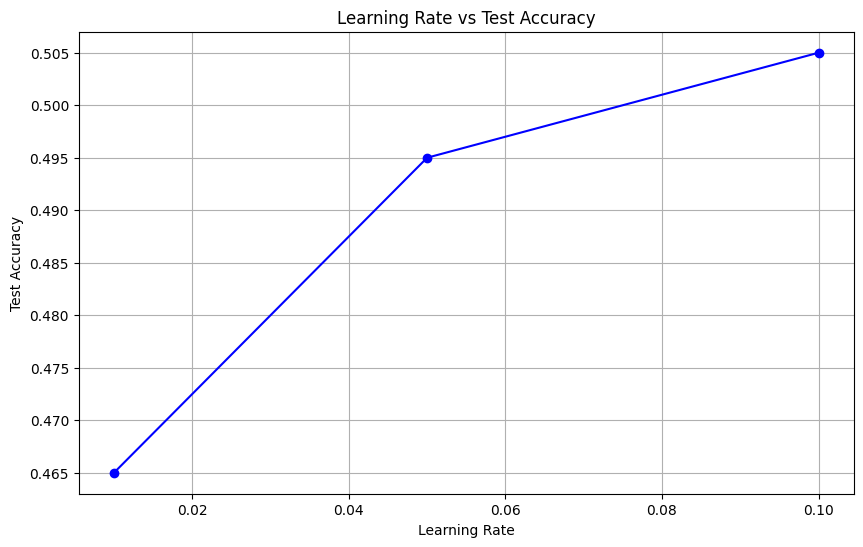

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define learning rates to test
learning_rates = [0.01, 0.05, 0.1]
num_epochs = 100  # Number of epochs for each learning rate
results = {}

# Function to train and evaluate model
def train_and_evaluate(model, optimizer, epochs):
    train_losses = []
    
    for epoch in range(epochs):
        # Training
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    
    # Evaluation
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_predictions = (test_outputs >= 0.5).float()
        test_accuracy = (test_predictions == y_test_tensor).float().mean()
    
    return test_accuracy.item()

# Test each learning rate
for lr in learning_rates:
    # Initialize new model
    model = LogisticRegressionModel(input_dim=X_train_tensor.shape[1])
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    
    # Train and evaluate
    accuracy = train_and_evaluate(model, optimizer, num_epochs)
    results[lr] = accuracy
    
    print(f"\nLearning Rate: {lr}")
    print(f"Test Accuracy: {accuracy:.4f}")

# Find best learning rate
best_lr = max(results.items(), key=lambda x: x[1])
print(f"\nBest Learning Rate: {best_lr[0]}")
print(f"Best Test Accuracy: {best_lr[1]:.4f}")

# Visualize results
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, [results[lr] for lr in learning_rates], 'bo-')
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy')
plt.title('Learning Rate vs Test Accuracy')
plt.grid(True)
plt.show()

### Step 8: Feature Importance

#### Task 8: Evaluate feature importance to understand the impact of each feature on the prediction.

The code to evaluate feature importance to understand the impact of each feature on the prediction.

1. Extracting Model Weights:
   - The weights of the logistic regression model represent the importance of each feature in making predictions. These weights are stored in the model's linear layer (`model.linear.weight`).
   - You can extract the weights using `model.linear.weight.data.numpy()` and flatten the resulting tensor to get a 1D array of feature importances.

2. Creating a DataFrame:
   - Create a pandas DataFrame with two columns: one for the feature names and the other for their corresponding importance values (i.e., the learned weights).
   - Ensure the features are aligned with their names in your dataset (e.g., `X_train.columns`).

3. Sorting and Plotting Feature Importance:
   - Sort the features based on the absolute value of their importance (weights) to identify the most impactful features.
   - Use a bar plot (via `matplotlib`) to visualize the sorted feature importances, with the feature names on the y-axis and importance values on the x-axis.

4. Interpreting the Results:
   - Larger absolute weights indicate more influential features. Positive weights suggest a positive correlation with the outcome (likely to predict the positive class), while negative weights suggest the opposite.

#### Exercise 8:

Evaluate feature importance by extracting the weights of the linear layer and creating a DataFrame to display the importance of each feature. Visualize the feature importance using a bar plot.


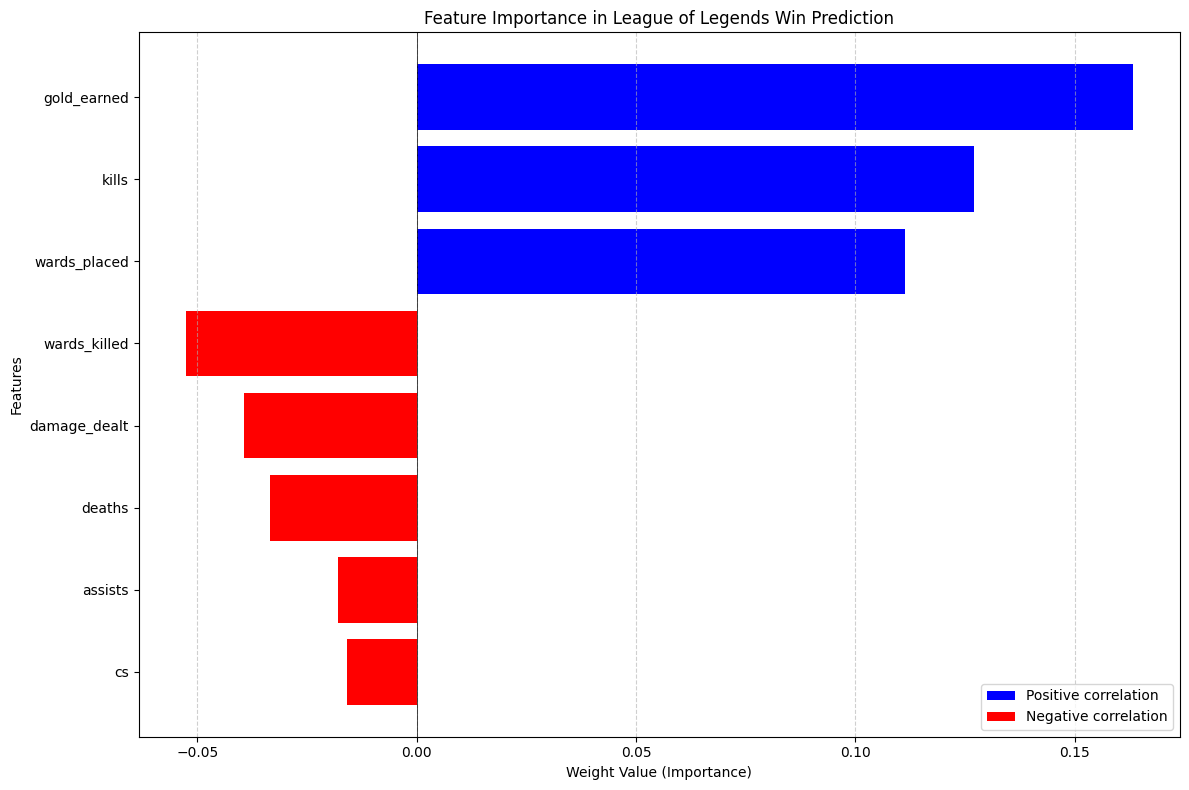


Feature Importance Rankings:
cs                                -0.0158
assists                           -0.0180
deaths                            -0.0335
damage_dealt                      -0.0393
wards_killed                      -0.0526
wards_placed                       0.1113
kills                              0.1271
gold_earned                        0.1632


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches  # Add this import

def analyze_feature_importance(model, feature_names):
    """
    Analyze and visualize feature importance from a trained model
    
    Parameters:
    - model: trained PyTorch model
    - feature_names: list of feature names from the dataset
    """
    # Extract model weights
    weights = model.linear.weight.data.numpy().flatten()
    
    # Create DataFrame with feature names and importance values
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': weights
    })
    
    # Calculate absolute importance and sort
    feature_importance['Abs_Importance'] = abs(feature_importance['Importance'])
    feature_importance = feature_importance.sort_values(
        by='Abs_Importance', 
        ascending=True
    )
    
    # Create visualization
    plt.figure(figsize=(12, 8))
    
    # Create color-coded horizontal bars
    colors = ['red' if x < 0 else 'blue' for x in feature_importance['Importance']]
    bars = plt.barh(feature_importance['Feature'], 
                   feature_importance['Importance'], 
                   color=colors)
    
    # Customize plot appearance
    plt.xlabel('Weight Value (Importance)')
    plt.ylabel('Features')
    plt.title('Feature Importance in League of Legends Win Prediction')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.grid(True, axis='x', linestyle='--', alpha=0.6)
    
    # Create legend handles manually
    legend_elements = [
        patches.Patch(facecolor='blue', label='Positive correlation'),
        patches.Patch(facecolor='red', label='Negative correlation')
    ]
    
    # Add legend with the manually created handles
    plt.legend(handles=legend_elements, loc='lower right')
    
    # Ensure all labels are visible
    plt.tight_layout()
    plt.show()
    
    # Print numerical rankings
    print("\nFeature Importance Rankings:")
    print("===========================")
    for idx, row in feature_importance.iterrows():
        print(f"{row['Feature']:<30} {row['Importance']:>10.4f}")
    
    return feature_importance

# Run the analysis with the trained model
feature_importance_df = analyze_feature_importance(model, X.columns)